In [3]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile, schedule
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import pulse
from qiskit.pulse.library import Gaussian, GaussianSquare, Drag
from qiskit.providers.fake_provider import FakeKolkata
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate, Parameter
import numpy as np
backend=FakeKolkata()

In [5]:
from qiskit_dynamics.backend import DynamicsBackend
backend= DynamicsBackend.from_backend(backend, subsystem_list=[0,5])

QiskitError: 'subsystem_list contained 5, which is out of bounds for backend with 2 qubits.'

# X cal

In [24]:
f=[]
for i in range(100):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=0.7171287840008055, amp=0.08+i*0.001, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=1000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/1000)

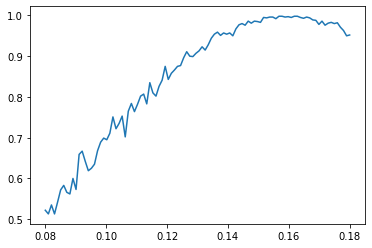

In [25]:
a=np.linspace(0.08,0.18,100)
plt.plot(a,f)
plt.show()

In [26]:
import numpy as np
from scipy.optimize import curve_fit
def _get_fitted_figure(xaxis, yaxis, init_guess, normalize=True):
        x = xaxis
        y = yaxis
        # normalization
        data = y
        if init_guess == None:
            init_guess = [0.5, np.pi, 0.5]
        else:
            init_guess = init_guess
        popt, pcov = curve_fit(_fitting_func, x, y, init_guess)
        #
        fig = plt.figure(figsize=(10, 7), dpi=400)
        fitted_y = _fitting_func(x, *popt)
        plt.plot(x, y, '--')
        plt.plot(x, fitted_y, 'o-', mfc='none')
        plt.grid()
        plt.show()
        print("Amp of peak:", x[np.argmax(fitted_y)])

def _fitting_func( x, amp, f, base):
    return amp * np.sin(f*x - np.pi/2) + base

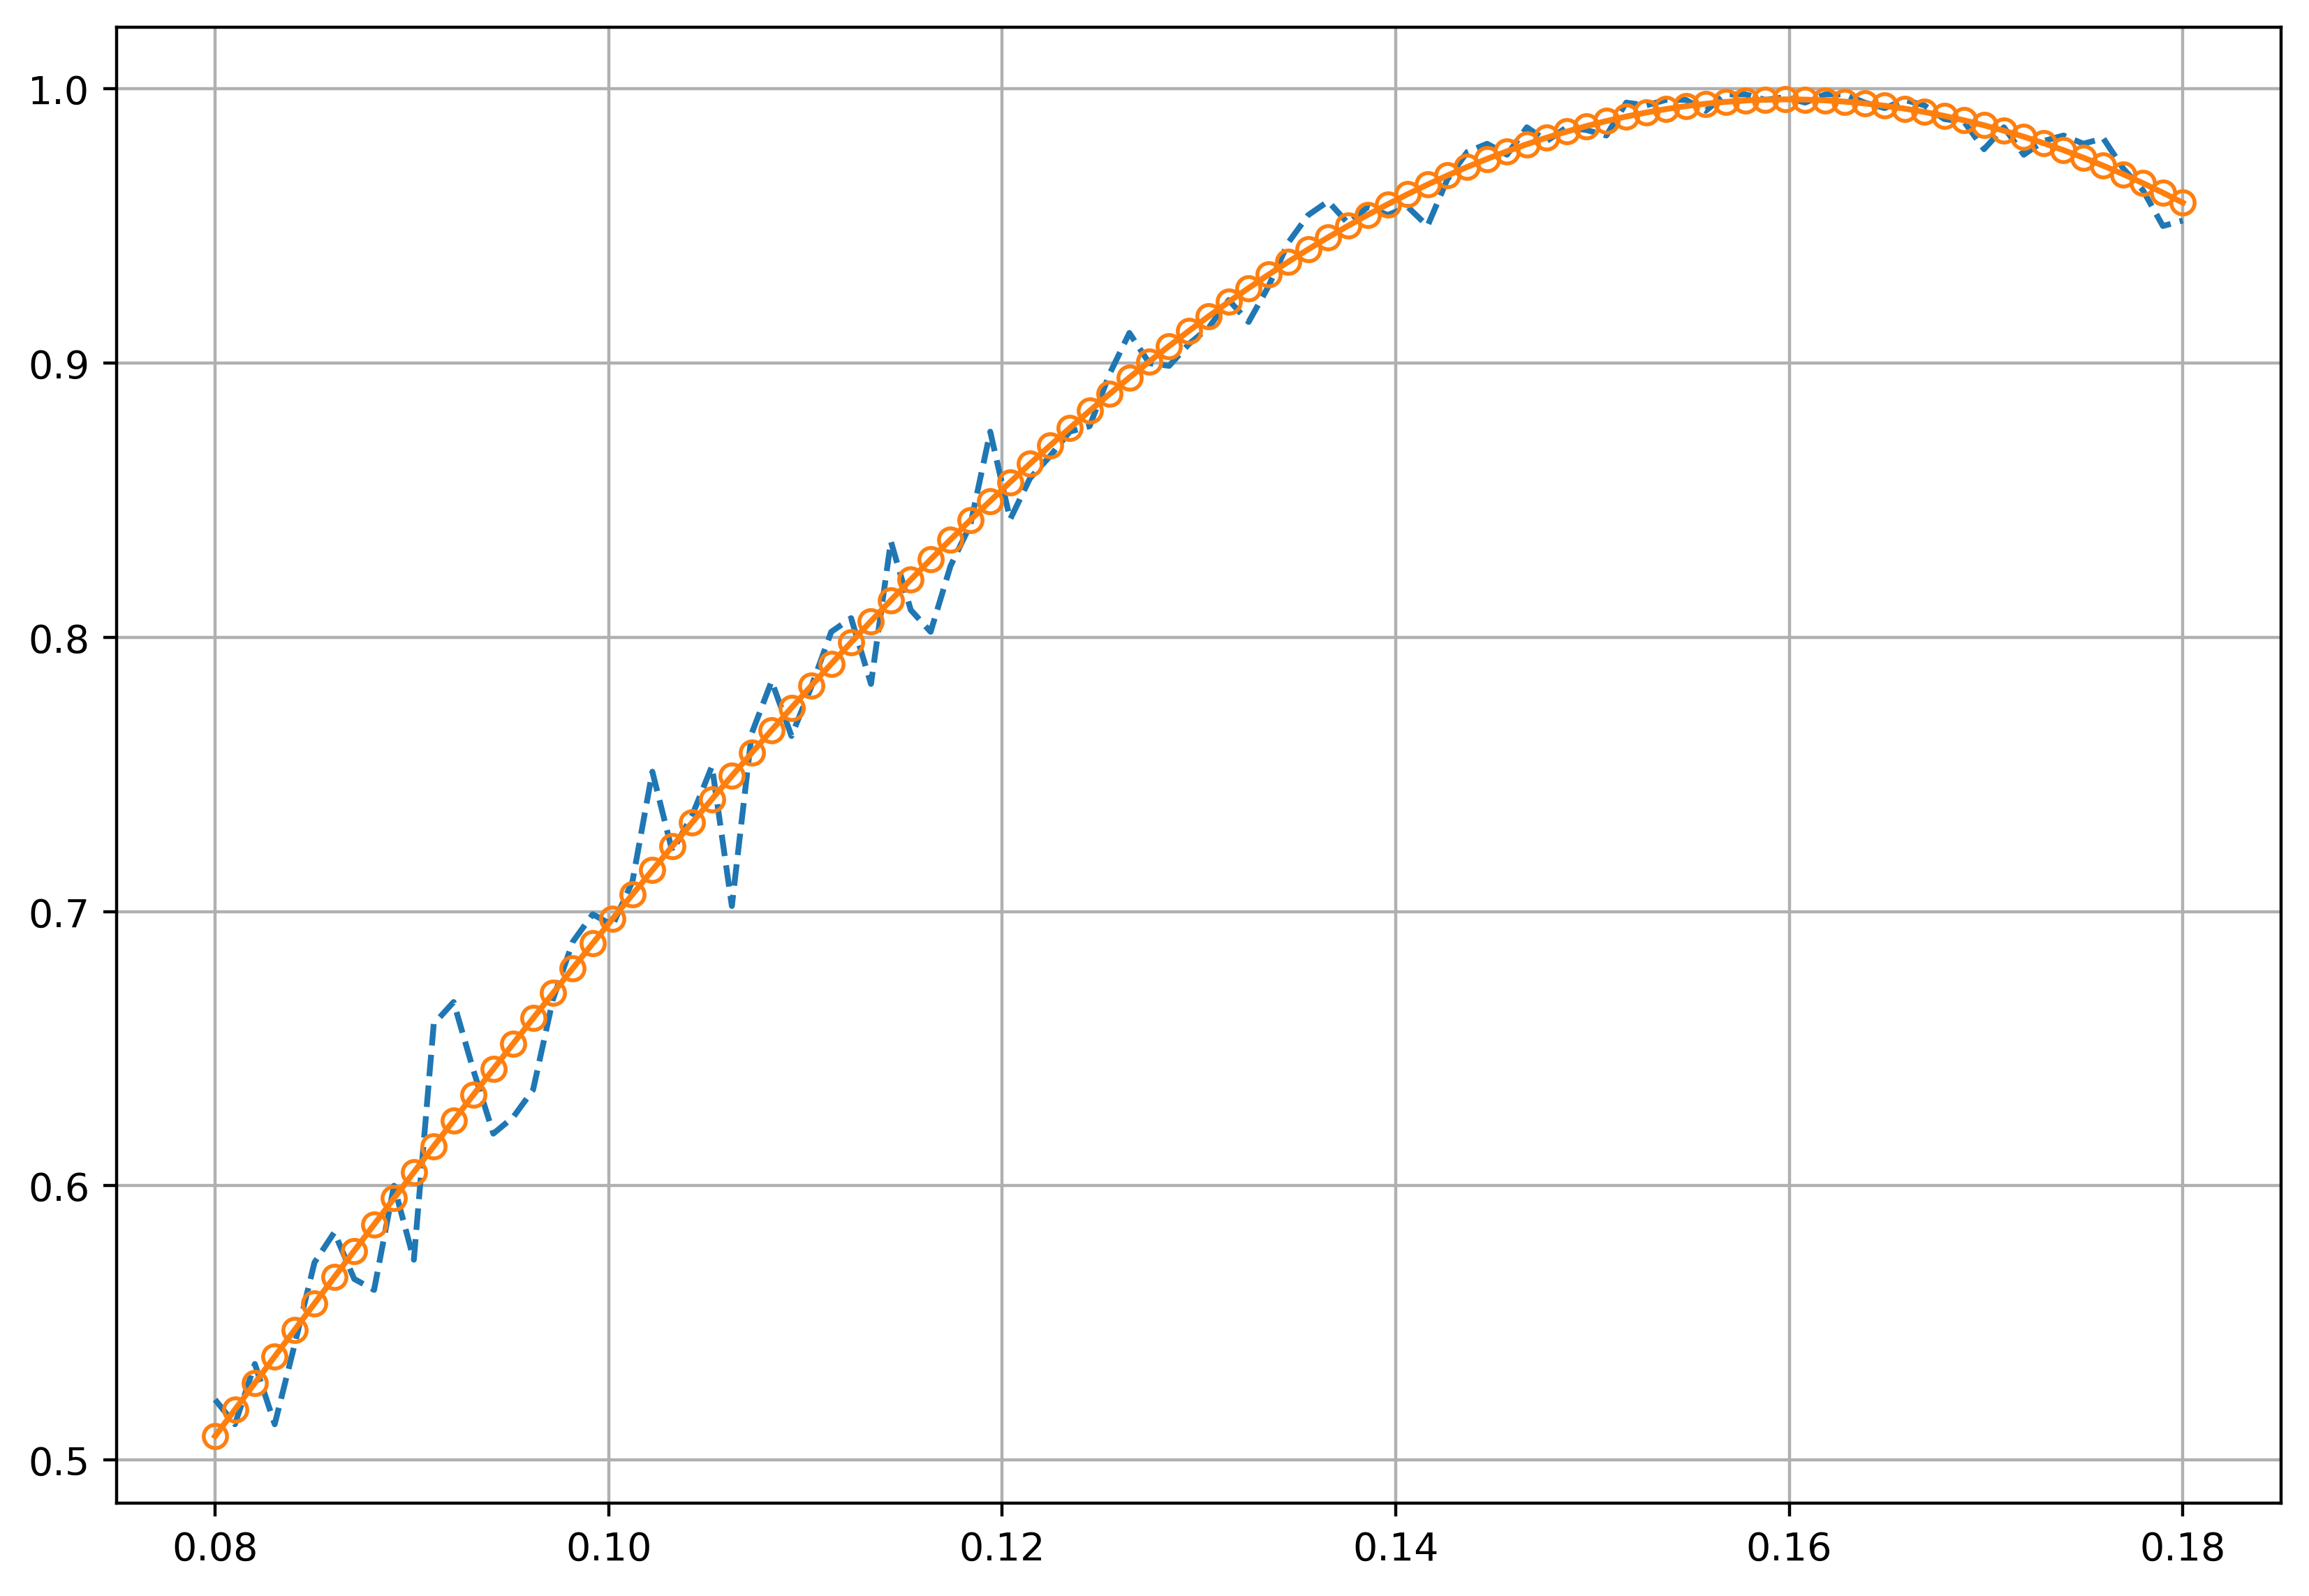

Amp of peak: 0.1597979797979798


In [27]:
_get_fitted_figure(xaxis=a,yaxis=f,init_guess = None,normalize=True)

In [28]:
f=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=0.7171287840008055, amp= 0.1597979797979798, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/20000)

In [29]:
np.mean(f)

0.997166

In [30]:
d=[]
for i in range(100):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-3+i*0.02, amp=0.15575757575757576, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=10000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/10000)

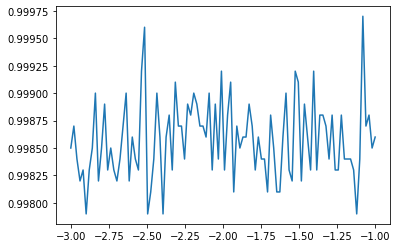

In [32]:
a=np.linspace(-3,-1,100)
plt.plot(a,d)
plt.show()

In [33]:
d=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-1.1, amp=0.15575757575757576, sigma=40), pulse.DriveChannel(0))
    X_cal.add_calibration('x',[0], x_q0)
    circ_transpile = transpile(X_cal, backend)
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/20000)

In [34]:
np.mean(d)

0.9983829999999999

# 원본 펄스 확인

In [36]:
backend_a=FakeKolkata()

In [41]:
circ=QuantumCircuit(1)
circ.x(0)
transpiled_circ=transpile(circ,backend_a)
schedule_circ=schedule(transpiled_circ,backend_a)
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, Play(Drag(duration=160, sigma=40, beta=0.7171287840008055, amp=0.1797336637124058, angle=0.0, name='Xp_d0'), DriveChannel(0), name='Xp_d0')), name="circuit-4135")

In [37]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(1)
    circ.x(0)
    circ.measure_all()
    job_a=backend_a.run(circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1"]/20000)


In [38]:
np.mean(f_a)

0.9911649999999999